# Plotting image data on a 3D Earth Model

In [1]:
import sys
import accessvis
import lavavu
import numpy as np
import math
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import xarray as xr

## Select our model resolution

This widget gives a quick way of choosing the level of detail to load, lower detail is faster and uses less memory but doesn't look as good, higher levels will be so slow to render that it will be difficult to interact with the model, best left for final renders.

The default parameter sets the initial choice [1-4]

In [2]:
accessvis.resolution_selection(default=1)

Low-res 2K - fast for testing
Mid-res 4K - good enough for full earth views
High res 8K - better if showing close up at country scale
Ultra-high 16K - max detail but requires a fast GPU with high memory


Dropdown(description='Detail:', options=(('Low-res 2K', 1), ('Mid-res 4K', 2), ('High-res 8K', 3), ('Ultra-hig…

## Create a simple earth relief plot

- See previous tutorial for details

In [3]:
lv = accessvis.plot_earth(texture='bluemarble', background="white", vertical_exaggeration=20)

#Zoom out
lv.translation(0.0, 0.0, -17)
lv.rotation(0.0, -125.0, 0.0) #Rotate to Australia

moderngl not available, try pip install moderngl



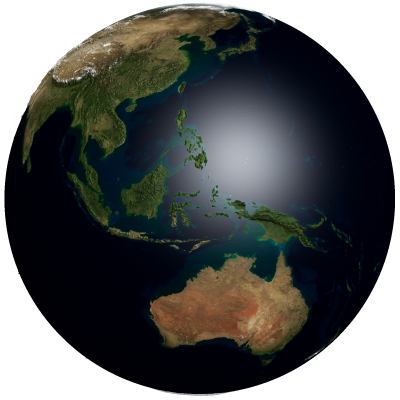

In [4]:
lv.display((400,400))

## Plot image data
Worldview snapshots https://wvs.earthdata.nasa.gov/

In [5]:
import time
baseurl = 'https://wvs.earthdata.nasa.gov/api/v1/snapshot?'
params = {'REQUEST': 'GetSnapshot',
          'LAYERS': 'VIIRS_NOAA20_CorrectedReflectance_TrueColor',
          'CRS': 'EPSG:4326',
          'TIME': '2024-09-25',
          'WRAP': 'DAY',
          'BBOX': '-90,-180,90,180',
          'FORMAT': 'image/jpeg',
          'WIDTH': 8192,
          'HEIGHT': 4096,
          'AUTOSCALE': 'TRUE',
          'ts': int(time.time()*1000)
         }
plist = [f"{p}={params[p]}" for p in params]
url = baseurl + '&'.join(plist)
url

fn = 'worldview_earth_snapshot.jpg'

In [6]:
if not os.path.exists(fn):
    accessvis.download(url, filename=fn)

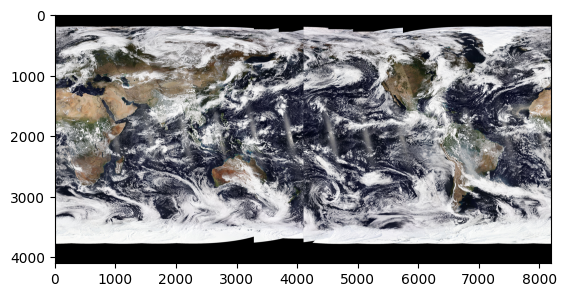

In [7]:
#Rotate the texture 180 degrees and set alpha channel in nodata regions
img = Image.open(fn)
arr = np.array(img)
arr = np.roll(arr, arr.shape[1] // 2, axis=1)
plt.imshow(arr)

In [8]:
#Use approximate luminance for opacity (so darker = transparent)
#This will reduce the data to mostly clouds and ice areas to overlay over our existing texture
alpha = (0.33*arr[:,:,0] + 0.5*arr[:,:,1] + 0.16*arr[:,:,2]).astype(np.uint8)

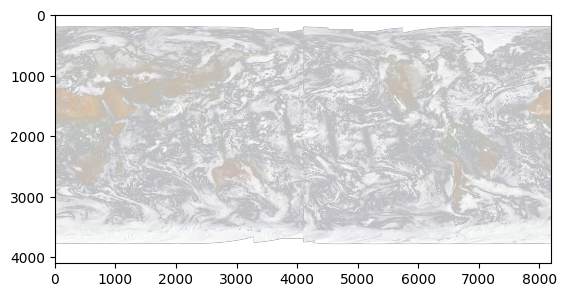

In [9]:
#Combine the calculated alpha channel with the rgb data
arr2 = np.dstack((arr, alpha))
plt.imshow(arr2)

# Add image data

Using dataMode=0 plots on both land and ocean

In [10]:
accessvis.update_earth_values(lv, dataMode=0, data=arr2)


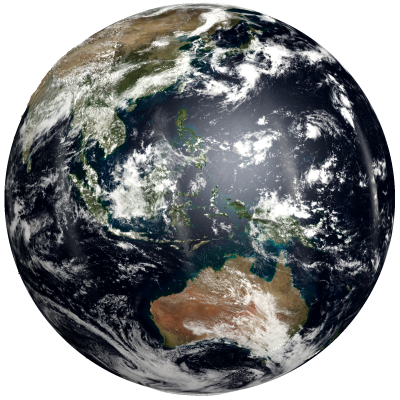

In [11]:
lv.display((400,400))

### Interactive viewer

In [ ]:
lv.window((600,600))